In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("../data/processed/cars_model_data.csv")

In [3]:
features = ["Age", "KM", "Weight", "HP"]

X = df[features]
y = df["Price"]


In [4]:
df

,Age,KM,Weight,HP,CC,Doors,MetColor,Price
0,23,46986,1165,90.0,2000,3,1.0,13500
1,23,72937,1165,90.0,2000,3,1.0,13750
2,24,41711,1165,90.0,2000,3,1.0,13950
3,26,48000,1165,90.0,2000,3,0.0,14950
4,30,38500,1170,90.0,2000,3,0.0,13750
...,...,...,...,...,...,...,...,...
1431,60,20544,1025,86.0,1300,3,1.0,7500
1432,72,63634,1015,86.0,1300,3,0.0,10845
1433,60,17016,1015,86.0,1300,3,0.0,8500
1434,70,63634,1015,86.0,1300,3,1.0,7250


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
rf2=RandomForestRegressor()


In [17]:
rf2.fit(X_train,y_train)

RandomForestRegressor()

In [18]:
rf2_pred=rf2.predict(X_test)

In [23]:
mae1= mean_absolute_error(y_test, rf2_pred)
rmse1 = np.sqrt(mean_squared_error(y_test, rf2_pred))
r21= r2_score(y_test, rf2_pred)

print("MAE:", mae1)
print("RMSE:", rmse1)
print("R² Score:", r21)

MAE: 891.7029253472222
RMSE: 1228.0242449320538
R² Score: 0.886976885881486


In [35]:
model_package={
    "model":rf2,
    "feature":features
}
joblib.dump(model_package, "../models/car_price_model_v2.pkl")

['../models/car_price_model_v2.pkl']

In [ ]:
model_package = joblib.load("../models/car_price_model_v2.pkl")

rf = model_package["model"]
features = model_package["feature"]

print("Model expects features:", features)


Model expects features: ['Age', 'KM', 'Weight', 'HP']


In [48]:
y_pred=rf.predict(X_test)

In [49]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 891.7029253472222
RMSE: 1228.0242449320538
R² Score: 0.886976885881486


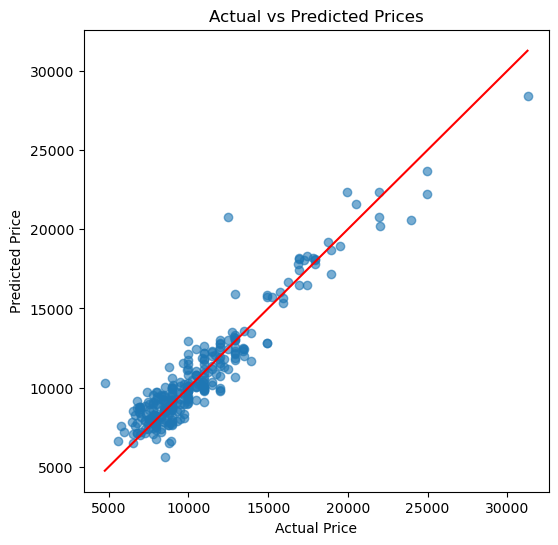

In [28]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, rf2_pred, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')

plt.show()


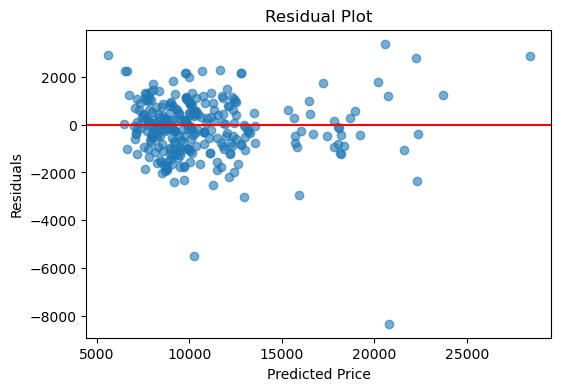

In [29]:
residuals = y_test - rf2_pred

plt.figure(figsize=(6,4))
plt.scatter(rf2_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


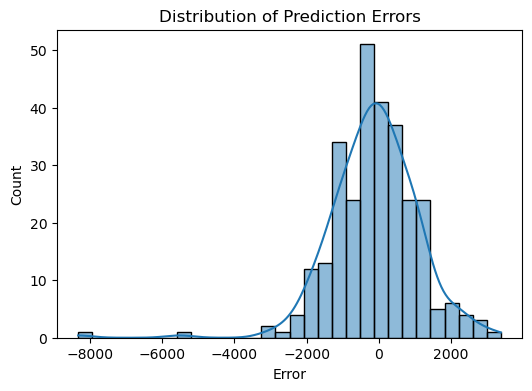

In [30]:
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error")
plt.show()


In [31]:
res= y_test - y_pred

outliers = X_test[abs(res) > 2000]  # threshold depends on data scale
outliers["Actual Price"] = y_test[abs(res) > 2000]
outliers["Predicted Price"] = y_pred[abs(res) > 2000]

outliers.head()


/tmp/ipykernel_90231/704456337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers["Actual Price"] = y_test[abs(res) > 2000]
/tmp/ipykernel_90231/704456337.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers["Predicted Price"] = y_pred[abs(res) > 2000]


,Age,KM,Weight,HP,Actual Price,Predicted Price
192,44,131273,1110,69.0,4750,7275.85
221,44,74172,1615,110.0,12450,15032.00


#### There are some outliers present in the dataset in [AGE] column and we again train the model by adding feature to get good model

In [32]:
print(len(X_train), len(X_test))
print(len(rf2_pred))


1148 288
288
